# 1 분류의 개요

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf= DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.2, random_state=11)

dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [13]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot',            # dt 는 공부한 기억, 분기조건이 있을거임 트리의, graph는 시각화를 해주는 도구 
                class_names= iris_data.target_names,                                       # outfile은 이름, 클래스의 이름은 , 순결도 지니계스
                feature_names = iris_data.feature_names,
                impurity=True,
                filled = True)

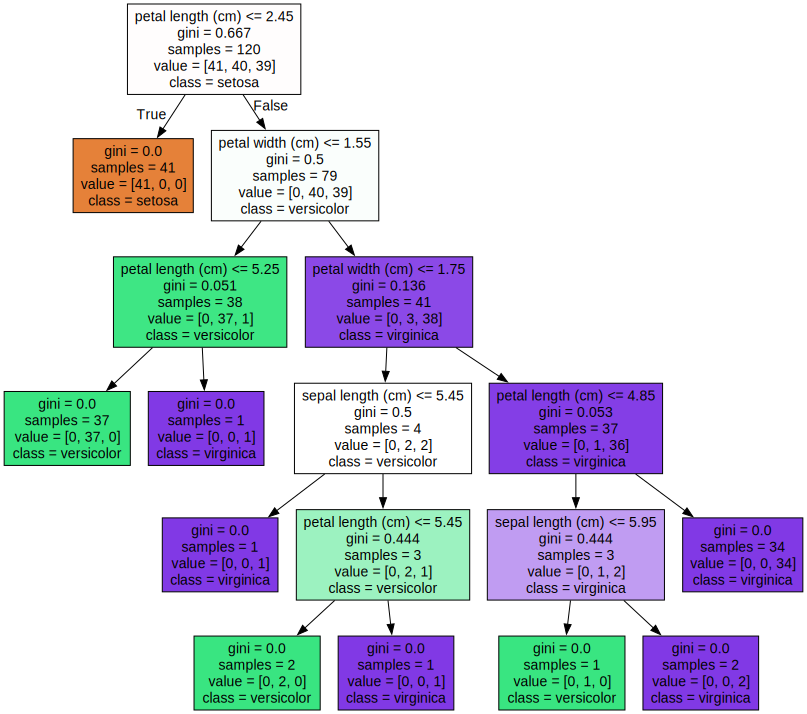

In [17]:
import graphviz

with open('tree.dot')as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)  

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix #예측 결과와 실제 결과를 비교하여 혼동 행렬(confusion matrix)을 생성하는 함수입
pred_test = dt_clf.predict(X_test) 

In [107]:
confusion_matrix(pred_test, y_test)

array([[ 9,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  9]], dtype=int64)

In [109]:
accuracy_score(pred_test,y_test)

0.9333333333333333

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) :0.025005
sepal width (cm) :0.000000
petal length (cm) :0.554903
petal width (cm) :0.420092


<Axes: >

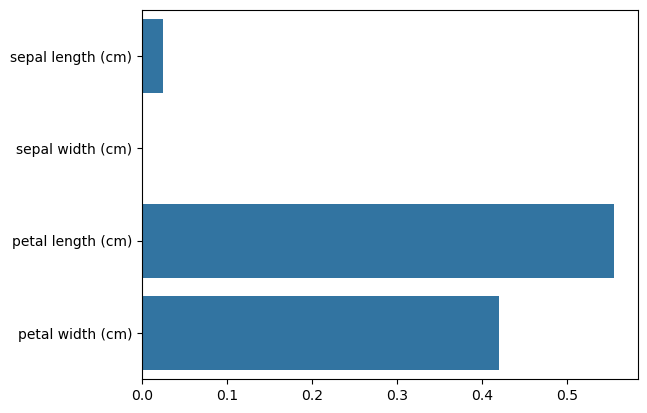

In [111]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} :{1:3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_ , y = iris_data.feature_names)

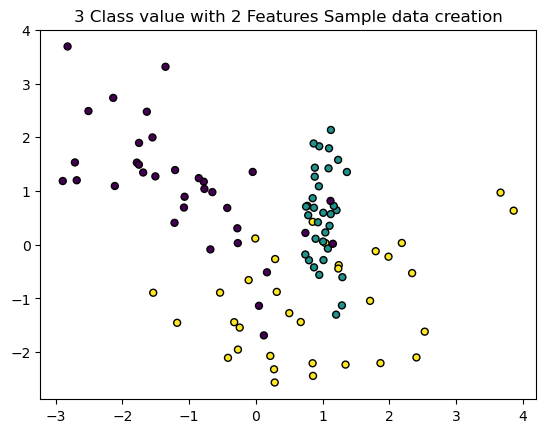

In [113]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class value with 2 Features Sample data creation")

X_feature, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_feature[:, 0], X_feature[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')
                                                            



In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
def visualize_boundary(model, X, y):
    fig,ax=plt.subplots()
   
    #학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:,0],X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end=ax.get_xlim()
    ylim_start, ylim_end=ax.get_ylim()
   
    #호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X,y)
   
    #meshgrid 형태인 모든 좌표값으로 예측 수행
    xx,yy=np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end,num=200))
    Z=model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
   
    #contourf() 이용하여 class boundary를 visualization 수행
    n_classes=len(np.unique(y))
    contours=ax.contourf(xx,yy,Z,alpha=0.3, levels=np.arange(n_classes+1)-0.5,
                         cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

In [2]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: name 'X_features' is not defined

In [ ]:
# 3 앙상블 학습

- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
-